In [8]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [0]:
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
from sklearn.preprocessing import StandardScaler, normalize

In [15]:
data = pd.read_csv('/content/drive/My Drive/ExoTrain.csv')
data.shape

(3960, 3198)

In [0]:
test_data = pd.read_csv('/content/drive/My Drive/exoTest.csv')

In [17]:
data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
1,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
2,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
3,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
4,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,139.34,146.76,149.16,162.55,159.35,173.32,108.24,175.35,143.40,119.30,168.29,111.73,123.88,111.99,95.35,139.62,127.99,66.95,90.45,63.15,64.90,-5.26,21.18,112.74,112.74,101.49,119.48,96.91,120.71,66.15,...,-3.63,3.73,-18.59,-62.30,-73.95,-112.23,-146.48,-76.82,-76.82,-68.02,-34.60,-71.05,-36.38,-6.16,-21.48,-57.98,-55.37,-64.99,-73.77,-33.41,-33.41,12.84,-22.15,-19.23,-8.40,22.04,-9.98,1.12,-49.16,-69.34,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [18]:
test_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [0]:
# Preparing the Dependent and Independent Variables

x = data.drop(['LABEL'], axis = 1)
y = data['LABEL']

In [0]:
# Standardisation and Normalisation

x = normalize(x)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [0]:
# Code to make all labels Binary
temp = []
for e in y:
  e = e-1
  temp.append(e)
  

In [0]:
# Splitting Dataset Into Training and Validation

X_train, X_test, y_train, y_test = train_test_split(x, temp, random_state = 0, test_size = 0.2)

In [0]:
# Let us See How Many Elements Are Present In Each Class

count_1 = 0
count_0 = 0
for e in y_train:
  if e == 1:
    count_1 = count_1 + 1
  elif e == 0:
    count_0 = count_0 + 1

In [24]:
print(count_0)
print(count_1)

3143
25


In [0]:
# Clearly the Dataset is Highly Imbalanced. Hence We need to Perform Synthetic Over Sampling.

# Preparing Test Set Data

In [0]:
x_testf = test_data.drop(['LABEL'], axis = 1)
y_testf = test_data['LABEL']

In [26]:
x_testf.shape

(570, 3197)

In [27]:
y_testf.shape

(570,)

In [0]:
x_testf = normalize(x_testf)
scaler = StandardScaler()
x_testf = scaler.fit_transform(x_testf)

In [0]:
# Code to make all labels Binary
temp2 = []
for e in y_testf:
  e = e-1
  temp2.append(e)
  

In [0]:
# x_testf and temp2 are the x_data and y_data for the test set respectively

In [0]:
#Dimentionlity reduction(Optional..In this Experiment Not Performing Reduction Yielded Better Results)
'''from sklearn.decomposition import PCA
pca = PCA() 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1'''

In [0]:
#Apply PCA with n_componenets
'''pca = PCA(n_components=k)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance in Dataset with Features')
plt.show()'''

# OverSampling Using SMOTE(Synthetic Minority Over-Sampling Technique)

In [0]:
# Now we use SMOTE to Synthesise Artificial Data to balance classes

In [30]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
sm = SMOTE(random_state=27, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# Let's count how many elements are present in Class 1

In [0]:
# The number of elements in each Class is now Equal

count_1 = 0
count_0 = 0
for e in y_train_res:
  if e == 1:
    count_1 = count_1 + 1
  elif e == 0:
    count_0 = count_0 + 1

In [34]:
print(count_0)
print(count_1)

3143
3143


In [35]:
x_train_res.shape

(6286, 3197)

In [36]:
y_train_res.shape

(6286,)

In [0]:
# Changing Input Dimesnions to Make it Usable In CNNs

from numpy import newaxis
x_train = x_train_res[ :, :, newaxis]

In [38]:
x_train.shape

(6286, 3197, 1)

In [39]:
X_test.shape

(792, 3197)

In [0]:
x_test = X_test[ :, :, newaxis]

In [41]:
x_test.shape

(792, 3197, 1)

In [0]:
x_testf2 = x_testf[ :, :, newaxis]

In [43]:
x_testf2.shape

(570, 3197, 1)

In [0]:
# Note that x_test and y_test are for Validation. x_testf2 and temp2 are Test Set.

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

Using TensorFlow backend.


# Multi-Channel CNN

In [0]:
# First Global-View CNN
model4 = Sequential(layers=[
    # Note the input shape is the desired size of the Signal 
    # This is the first convolution
    Conv1D(3, (2001), activation='relu', input_shape=(3197,1)),
    Conv1D(16, (5), activation='relu'),
    Conv1D(16, (5), activation='relu'),
    MaxPooling1D(5, 2),
   
    Conv1D(32, (5), activation='relu'),
    Conv1D(32, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(64, (5), activation='relu'),
    Conv1D(64, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(128, (5), activation='relu'),
    Conv1D(128, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(256, (5), activation='relu'),
    Conv1D(256, (5), activation='relu'),
    MaxPooling1D(5, 2),
  
    # Flatten the results to feed into a DNN
    Flatten(),
    Dense(256, activation='relu'),
    
])

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1197, 3)           6006      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1193, 16)          256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1189, 16)          1296      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 593, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 589, 32)           2592      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 585, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 291, 32)          

In [0]:
# Local View CNN
model5 = Sequential(layers=[
    # Note the input shape is the desired size of the signal
    # This is the first convolution
    Conv1D(3, (201), activation='relu', input_shape=(3197,1)),
    Conv1D(16, (5), activation='relu'),
    Conv1D(16, (5), activation='relu'),
    MaxPooling1D(7, 2),
   
    Conv1D(32, (5), activation='relu'),
    Conv1D(32, (5), activation='relu'),
    MaxPooling1D(7, 2),

  
    # Flatten the results to feed into a DNN
    Flatten(),
    Dense(256, activation='relu'),

    
])

model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 2997, 3)           606       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2993, 16)          256       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2989, 16)          1296      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1492, 16)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1488, 32)          2592      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1484, 32)          5152      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 739, 32)          

In [0]:
# Merging outputs of both Models Together

from keras.layers import concatenate
from keras.layers import *
mergedOut = Add()([model4.output,model5.output])

In [0]:
# Adding Some Fully-Connected Layers

mergedOut = Dense(512, activation='relu')(mergedOut)
mergedOut = Dense(512, activation='relu')(mergedOut)
mergedOut = Dense(512, activation='relu')(mergedOut)

# output layer
mergedOut = Dense(1, activation='sigmoid')(mergedOut)

In [0]:
from keras.models import Model

newModel = Model([model4.input,model5.input], mergedOut)

In [0]:
import keras
from tensorflow.keras.optimizers import Adam, SGD
adam = keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95)
newModel.compile(loss='binary_crossentropy',
               optimizer = adam,
               metrics=['acc'])

In [0]:
history4 = newModel.fit([x_train,x_train], y_train_res, epochs = 20, batch_size = 20, validation_data = ([x_test,x_test],y_test))

Train on 6286 samples, validate on 792 samples
Epoch 1/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.1313 - acc: 0.9739 - val_loss: 0.1571 - val_acc: 0.9356
Epoch 2/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.1133 - acc: 0.9792 - val_loss: 0.1420 - val_acc: 0.9432
Epoch 3/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.0985 - acc: 0.9809 - val_loss: 0.1263 - val_acc: 0.9495
Epoch 4/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.0864 - acc: 0.9833 - val_loss: 0.1374 - val_acc: 0.9444
Epoch 5/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.0764 - acc: 0.9844 - val_loss: 0.1192 - val_acc: 0.9533
Epoch 6/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.0677 - acc: 0.9866 - val_loss: 0.1003 - val_acc: 0.9646
Epoch 7/20
6286/6286 [==============================] - 7s 1ms/step - loss: 0.0602 - acc: 0.9882 - val_loss: 0.0918 - val_acc: 0.9684
Epoch 8/20
6286

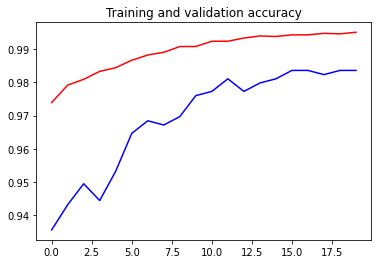

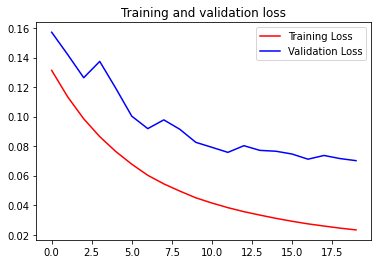

In [0]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# We can Observe from Loss and Accuracy Graphs that Model isn't Overtfitting

In [0]:
y_pred = newModel.predict([x_test,x_test])

In [0]:
y_pred2 = []
for m in y_pred:
  if m > 0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(0)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
# The Architecture Identifies 777/784 cases of Non-Exo-Planets Correctly in Validation Set
# The Architecture however Fails to Identify Exo-Planet and Identifies 2/8 Cases in Validation Set

confusion_matrix(y_pred2,y_test)

array([[777,   6],
       [  7,   2]])

In [0]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       784
           1       0.22      0.25      0.24         8

    accuracy                           0.98       792
   macro avg       0.61      0.62      0.61       792
weighted avg       0.98      0.98      0.98       792



In [0]:
y_pred2 = newModel.predict([x_testf2,x_testf2])

In [0]:
y_pred3 = []
for m in y_pred2:
  if m > 0.5:
    y_pred3.append(1)
  else:
    y_pred3.append(0)

In [0]:
# The Architecture Gives good result on Test Set
# The Architecture Identifies all Non-ExoPlanets Correctly Which is Extremely Encouraging
# The Architecture Identifies 3/5 Exo-Planets Correctly

confusion_matrix(y_pred3, temp2)

array([[565,   2],
       [  0,   3]])

In [0]:
# Precision and Recall are perfect for the Non-ExoPlanets because the model predicts Non-ExoPlanets Flawlessly
# Recall goes down for Exo-Planets because 2 Exo-Planets were Mis-Classified as Non-ExoPlanets

print(classification_report(temp2,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570

